# TASK 6.6 : Analyzing Time series Data

### This script contains:
#### 1. Importing Libraries and Data
#### 2. subsetting,wrangling and cleaning time series data
#### 3.Time series Analysis 
#### 4. Testing for stationarity

### 1. Importing Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Defining path
path = r'C:\Users\user\Waiting times for priority procedures'


In [3]:
path

'C:\\Users\\user\\Waiting times for priority procedures'

In [4]:
# importing data
df = pd.read_csv(os.path.join(path,'1.Data', 'Prepared data','waiting time cataract surgery.csv' ))

In [27]:
df.head()

,state,medical_procedure,year,%meeting_benchmark,50th_percentile_days,90th_percentile_days,total_cases
0,Canada,Cataract Surgery,2010,82.72,52,147,157278
1,Canada,Cataract Surgery,2011,82.48,49,149,161524
2,Canada,Cataract Surgery,2012,83.32,47,145,166596
3,Canada,Cataract Surgery,2013,81.37,47,154,170160
4,Canada,Cataract Surgery,2014,80.12,49,161,168072


In [5]:
# subsetting the data
df_sub = df[['year','%meeting_benchmark','50th_percentile_days','90th_percentile_days','total_cases']]


In [6]:
df_sub.head()

,year,%meeting_benchmark,50th_percentile_days,90th_percentile_days,total_cases
0,2010,82.72,52,147,157278
1,2011,82.48,49,149,161524
2,2012,83.32,47,145,166596
3,2013,81.37,47,154,170160
4,2014,80.12,49,161,168072


In [7]:
df_sub.tail()

,year,%meeting_benchmark,50th_percentile_days,90th_percentile_days,total_cases
7,2017,70.89,66,211,169667
8,2018,70.10,65,218,177463
9,2019,70.48,67,219,183017
10,2020,44.91,133,310,96706
11,2021,66.18,72,255,164083


In [8]:
#changing the column heads
df_sub.rename(columns = {'50th_percentile_days':'med_wait_days','90th_percentile_days':'max_wait_days'},inplace = True)

In [9]:
df_sub.head()

,year,%meeting_benchmark,med_wait_days,max_wait_days,total_cases
0,2010,82.72,52,147,157278
1,2011,82.48,49,149,161524
2,2012,83.32,47,145,166596
3,2013,81.37,47,154,170160
4,2014,80.12,49,161,168072


In [10]:
df_sub.shape

(12, 5)

In [11]:
df_sub.columns

Index(['year', '%meeting_benchmark', 'med_wait_days', 'max_wait_days',
       'total_cases'],
      dtype='object')

In [12]:
type(df_sub)

pandas.core.frame.DataFrame

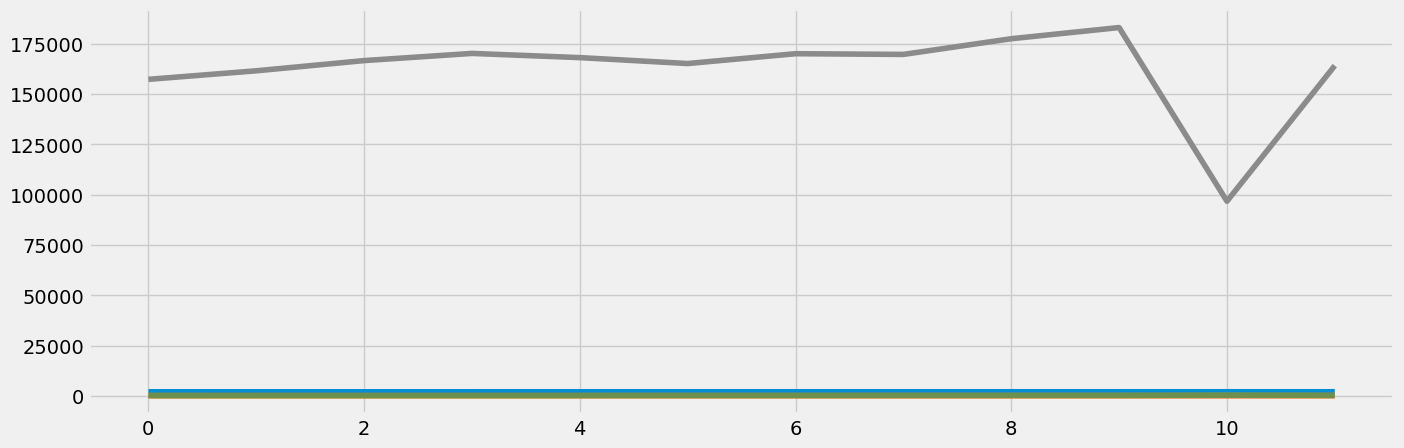

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_sub)

In [19]:
# Set index as year
df_ind = df_sub.set_index('year')


In [20]:
df_ind.head()

,%meeting_benchmark,med_wait_days,max_wait_days,total_cases
year,,,,
2010,82.72,52,147,157278
2011,82.48,49,149,161524
2012,83.32,47,145,166596
2013,81.37,47,154,170160
2014,80.12,49,161,168072


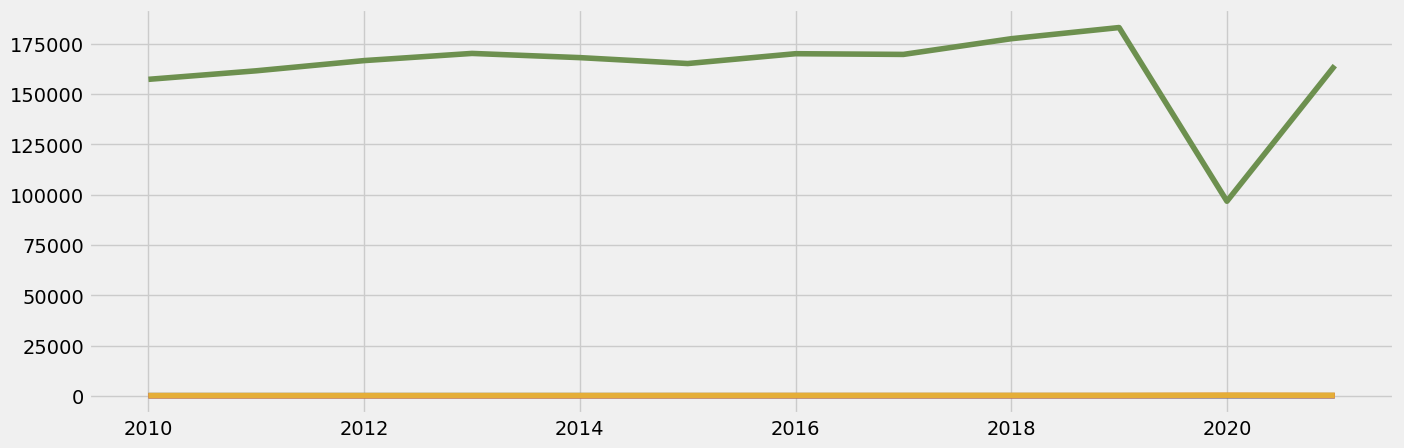

In [22]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_ind)

### From the chart it is clear that the total cataract surgery cases have stayed almost constant over the years.
### However the total cataract surgeries performed fell drastically in 2019 and were the lowest in 2020 which is the period of covid pandemic probably because high risk of covid infection through the eye.

In [27]:
#Subseting df ind to get time series for "wait times"
df_wait = df_sub[['year','med_wait_days']]

In [28]:
df_wait.head()

,year,med_wait_days
0,2010,52
1,2011,49
2,2012,47
3,2013,47
4,2014,49


In [31]:
# indexing year
df_w = df_wait.set_index('year')

In [32]:
df_w.head()

,med_wait_days
year,
2010,52
2011,49
2012,47
2013,47
2014,49


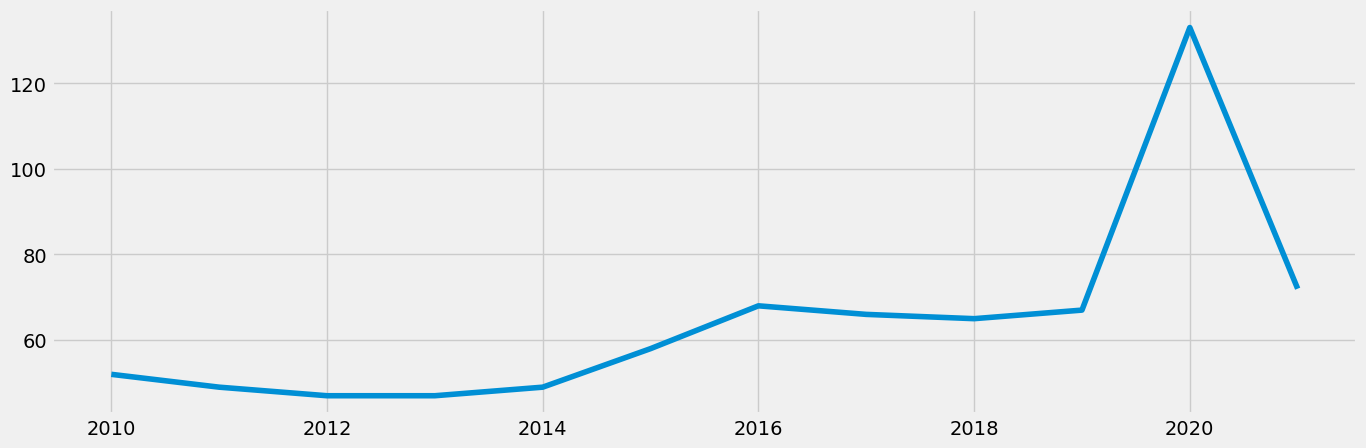

In [33]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_w)

###  As is visible in the chart the median waiting time for cataract surgeries has stayed almost contant from 2010 -2014.
### There is increase is a considerable increase between 2014-2016 upto 70 days after which it stayed almost constant up untill 2019 when a sudden spike can be seen in the waiting time, which corresponds to the covid pandemic.
### 2020 recorded the highest waiting time of over 130 days and the least number of total cases(as shown in the previous time series).

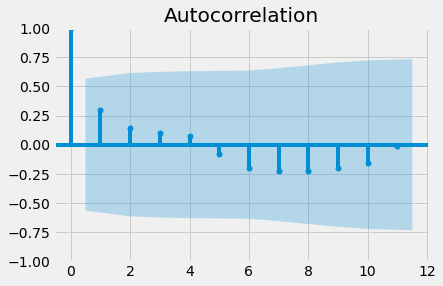

In [37]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_w)
plt.show()

### Since the dataset we used contains a single observation for every year, the question of seasonality, noise doesnot arise. Hence we have not perform the decomposition analysis on this dataset.